<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/regression_residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

Shapiro-Wilk Test Statistic: 0.8013644218444824, P-Value: 3.1603688646652563e-15
The residuals do not seem to be normally distributed.


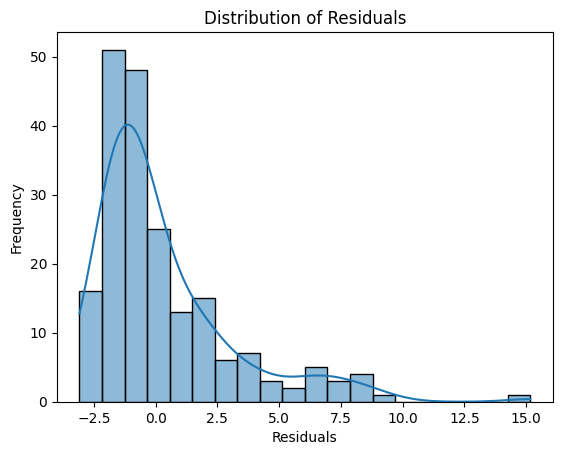

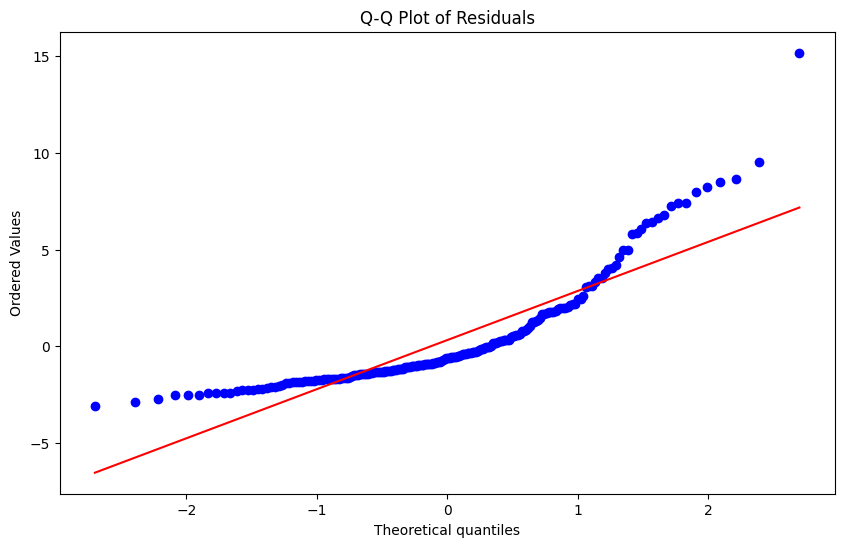

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     592.7
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           2.42e-98
Time:                        15:38:51   Log-Likelihood:                -1932.7
No. Observations:                 800   AIC:                             3869.
Df Residuals:                     798   BIC:                             3879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0956      0.112     27.522      0.0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split


X = 2.5 * np.random.randn(1000) + 1.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(1000)       # Generate 1000 residual terms
y = 2 + 0.3 * X**2 + res                   # Actual values of Y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent variable matrix X for the intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_const).fit()

# Predict the values on the test set
y_pred = model.predict(X_test_const)

# Calculate residuals
residuals = y_test - y_pred

# Conducting Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {stat}, P-Value: {p_value}')

# Interpretation of the Shapiro-Wilk test
if p_value > 0.05:
    print("The residuals seem to be normally distributed.")
else:
    print("The residuals do not seem to be normally distributed.")

# Plotting residuals to check for normality
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Q-Q plot for the residuals
plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Optionally, print the summary of the regression model to get more insights
print(model.summary())
